
# Profile
- **Course**: EC9630 – MACHINE LEARNING
- **Task** : UNSUPERVISED LEARNING LAB 05
- **Name**: Uzair UM
- **Student ID**: 2020/E/201
- **Date**: 12 / August / 2024
- **Time** : 8:00 - 11:00 AM



In [4]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()




Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [5]:
import pandas as pd

file_name = 'online_shoppers_intention.csv'
data = pd.read_csv(file_name)


In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#Exploratory Data Analysis and Preprocessing

In [7]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**Encode categorical variables**

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = label_encoder.fit_transform(data['Weekend'])
data['Month'] = label_encoder.fit_transform(data['Month'])

**Scale numerical features**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


#Visualize the Distribution of Features

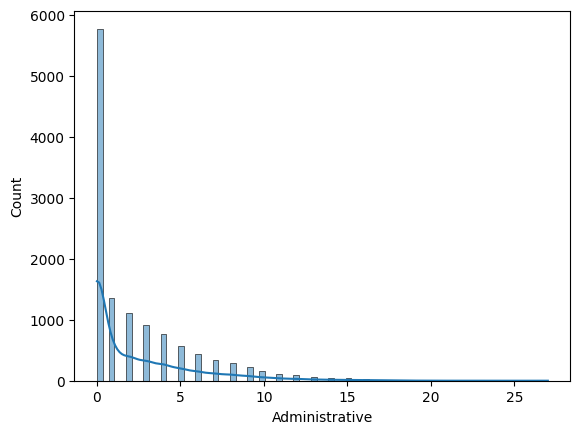

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Administrative'], kde=True)
plt.show()


#Create Training and Test Datasets

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Implement K-means Clustering

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

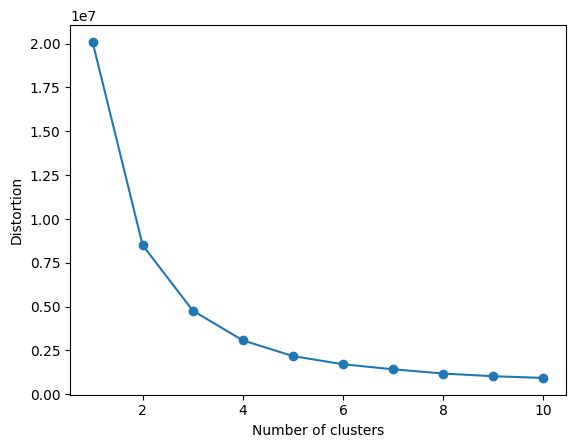

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


**K-means Clustering:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


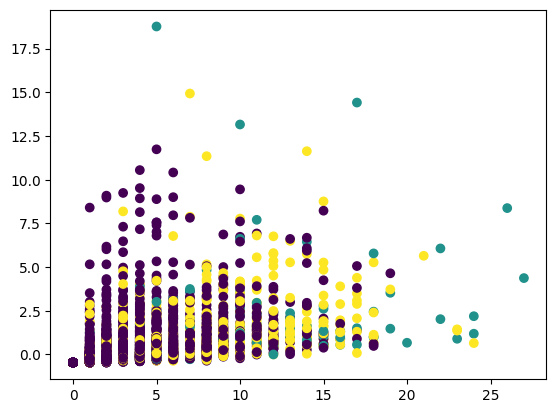

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=clusters, cmap='viridis')
plt.show()


#Implement Gaussian Mixture Model (GMM)

**Initialize and Train GMM**

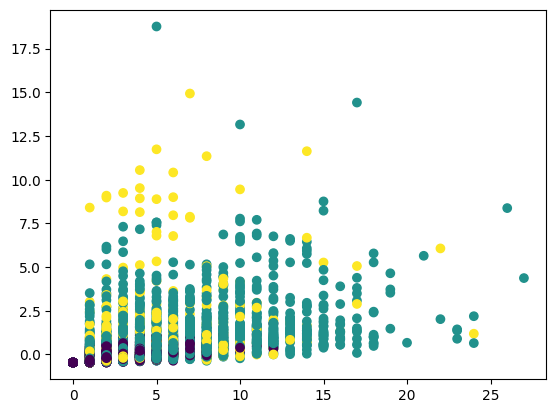

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_train)

clusters_gmm = gmm.predict(X_train)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=clusters_gmm, cmap='viridis')
plt.show()


#Compare K-means and GMM Results

**Compare clustering results**


#Evaluate Clustering Performance

In [15]:
from sklearn.metrics import silhouette_score

print("KMeans Silhouette Score: ", silhouette_score(X_train, clusters))
print("GMM Silhouette Score: ", silhouette_score(X_train, clusters_gmm))


KMeans Silhouette Score:  0.6653557576601042
GMM Silhouette Score:  0.09878911720499756
